In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   105 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [8]:
df = df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'SALES'})

In [9]:
df['Month'] = pd.to_datetime(df['Month'])
df.head() 

,Month,SALES
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [10]:
df.set_index('Month', inplace=True)
df.head()

,SALES
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<Axes: xlabel='Month'>

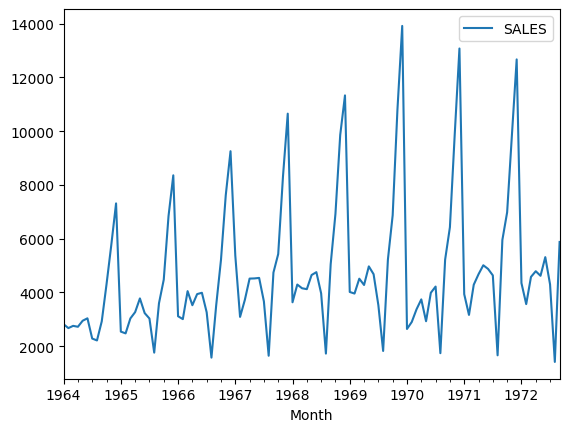

In [11]:
df.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
df_fuller = adfuller(df['SALES'])

In [14]:
# Hipotesis 1q::\ she is not 0 it stationary
# Hipotesis 1 :t is the first stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observation Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[0] <= 0.5:
        print('strong evidence against the null hypotesis')
    else :
        print('weak evidence against the null hypothesis')

In [15]:
adfuller_test(df['SALES'])

ADF Test Statistic : -1.8335930563276204
p-value : 0.3639157716602462
#Lags Used : 11
Number of Observation Used : 93
strong evidence against the null hypotesis


Differencing

In [16]:
df['Sales First Difference'] = df['SALES'] - df['SALES'].shift(1)

In [17]:
df.head()

,SALES,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [19]:
df['Seasonal First Difference']=df['SALES']-df['SALES'].shift(12)

In [20]:
df.head()

,SALES,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [1]:
import snowflake.connector